# Kaggle에 있는 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bc = pd.read_csv('./BankChurners.csv')

bc.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## 목적: 카드사의 고객 정보를 토대로 Attrition_Flag(이탈) 여부에 영향을 끼치는 요소를 확인해보자

### 칼럼 확인

In [9]:
bc.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Attrition_Flag : 이탈 여부  
Customer_Age: 나이  
Gender: 성별  
Dependent_count: 부양 가족 수?  
Education_Level: 교육 수준  
Marital_Status: 결혼 여부  
Income_Category: 소득  
Card_Category: ('Blue', 'Gold', 'Silver', 'Platinum')  
Months_on_book: 13 ~ 56 정수. 카드 사용 기간  
Total_Relationship_Count: 1 ~ 6 정수. 보유한 카드 수  
Months_Inactive_12_mon: 1 ~ 6 정수. 12개월 이상 비활성인 개월 수  
Contacts_Count_12_mon: 1 ~ 6 정수. 지난 12개월 동안 은행과 연락 횟수  
Credit_Limit: 1488 ~ 34516 정수. 신용 한도액  
Total_Revolving_Bal: 0 ~ 2517 정수. 신용카드 회전 잔액?  
Avg_Open_To_Buy: 구매 가능액 평균  
Total_Amt_Chng_Q4_Q1: 거래 변동 금액  
Total_Trans_Amt: 총 거래 금액  
Total_Trans_Ct: 총 거래 수  
Total_Ct_Chng_Q4_Q1: 거래 건수 변동  
Avg_Utilization_Ratio: 평균 카드 사용률  


뒤에 칼럼 2개는 모르는 내용이라 일단 버린다. (Naive_Bayes_Classifier)

In [21]:
bc = bc.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
bc.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## 1. 교육 수준과의 관계 확인

Existing Customer에 교육 수준이 높은 사람들 비중이 높지 않을까?

In [105]:
ex_ed = bc[bc['Attrition_Flag'] == 'Existing Customer']['Education_Level'].value_counts()
print(ex_ed)
print('*'*20)

at_ed = bc[bc['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].value_counts()
print(at_ed)

Graduate         2641
High School      1707
Unknown          1263
Uneducated       1250
College           859
Post-Graduate     424
Doctorate         356
Name: Education_Level, dtype: int64
********************
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: Education_Level, dtype: int64


In [111]:
ex_ed_ratio = ex_ed/ex_ed.sum()
at_ed_ratio = at_ed/at_ed.sum()

In [113]:
df = pd.DataFrame([ex_ed_ratio, at_ed_ratio], index=['Exist', 'Attrited'],
                 columns=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'])
df

,Uneducated,High School,College,Graduate,Post-Graduate,Doctorate,Unknown
Exist,0.147059,0.200824,0.101059,0.310706,0.049882,0.041882,0.148588
Attrited,0.145667,0.188076,0.094653,0.299324,0.056546,0.058390,0.157345


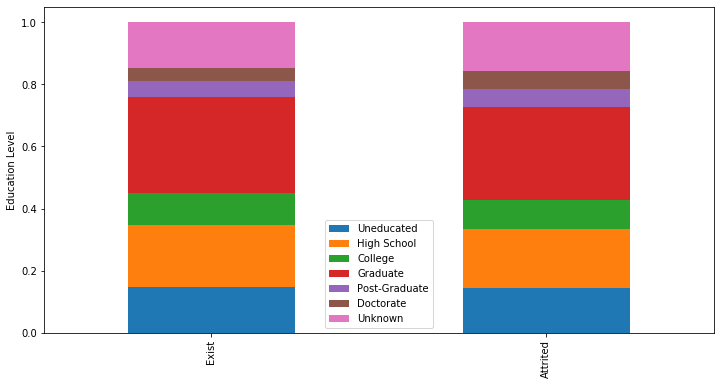

In [121]:
df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Education Level')
plt.show()

반대로, 이탈 회원 중에 오히려 고학력(대학원, 박사) 비율이 조금 높다

## 2. 성별 확인

성별과는 무관할 것 같다

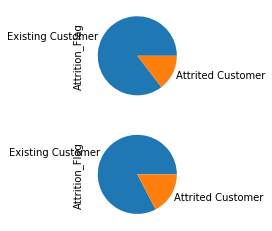

In [171]:
fig, (ax1, ax2) = plt.subplots(2, 1)

male = bc[bc["Gender"] == 'M']["Attrition_Flag"].value_counts()
female = bc[bc["Gender"] == 'F']["Attrition_Flag"].value_counts()

male.plot(kind='pie', ax=ax1)
female.plot(kind='pie', ax=ax2)

plt.show()

거의 비슷한데, 다르게 확인

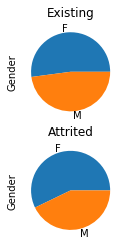

In [174]:
fig, (ax1, ax2) = plt.subplots(2, 1)

male = bc[bc["Attrition_Flag"] == 'Existing Customer']["Gender"].value_counts()
female = bc[bc["Attrition_Flag"] == 'Attrited Customer']["Gender"].value_counts()

male.plot(kind='pie', ax=ax1, title='Existing')
female.plot(kind='pie', ax=ax2, title='Attrited')

plt.show()

이탈한 회원의 여성 비중이 더 높다.

## 3. 나이

별 차이 없을 듯 하다.

In [184]:
bc['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27], dtype=int64)

In [186]:
ex = bc[bc["Attrition_Flag"] == 'Existing Customer']["Customer_Age"]
at = bc[bc["Attrition_Flag"] == 'Attrited Customer']["Customer_Age"]

ex, at

(0        45
 1        49
 2        51
 3        40
 4        40
          ..
 10116    46
 10117    57
 10120    54
 10121    56
 10122    50
 Name: Customer_Age, Length: 8500, dtype: int64,
 21       62
 39       66
 51       54
 54       56
 61       48
          ..
 10119    55
 10123    41
 10124    44
 10125    30
 10126    43
 Name: Customer_Age, Length: 1627, dtype: int64)

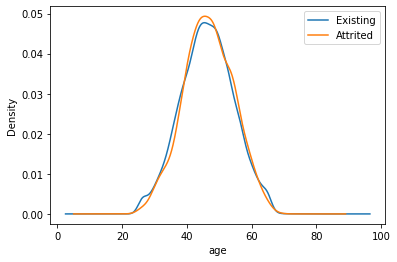

In [203]:
ex.plot(kind='kde')
at.plot(kind='kde')

plt.xlabel('age')

plt.legend(['Existing', 'Attrited'])
plt.show()

예상대로, 나이는 큰 상관관계가 없다.